In [ ]:
!nvidia-smi

Sat Oct 21 16:42:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!sudo apt-get -y install cuda

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html


In [ ]:
!pip install typing-extensions==3.7.4.3

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.22 requires typing-extensions>=4.2.0, but you have typing-extensions 3.7.4.3 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.7.4.3 which is incompatible.
chex 0.1.7 requires typing-extensions>=4.2.0; python_version < "3.11", but you have typing-extensions 3.7.4.3 which is incompatible.
fastapi 0.104.0 requires typing-extensions>=4.8.0, but you have typing-extensions 3.7.4.3 which is incompatible.
flax 0.7.4 requires typing-extensions>=4.2, but you have typing-extensions 3.7.4.3 which is 

In [ ]:
!pip install fastapi
!pip install uvicorn
!pip install python-multipart
!pip install kaleido

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
# Cython needs to be installed before pycocotools
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib roboflow

In [ ]:
#import os
#os.kill(os.getpid(), 9)

In [ ]:
!git clone https://github.com/dbolya/yolact.git
%cd yolact

fatal: destination path 'yolact' already exists and is not an empty directory.
/content/yolact


In [ ]:
!pip install torch==2.1.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.1.0+cu118
True
Tesla T4


In [ ]:
#!sh /content/yolact/data/scripts/COCO.sh

In [ ]:
%cd /content/yolact/external/DCNv2
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:502: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
Traceback (most recent call last):
  File "/content/yolact/external/DCNv2/setup.py", line 56, in <module>
    setup(
  File "/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py", line 107, in setup
    return distutils.core.setup(**attrs)
  File "/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/core.py", line 185, in setup
    return run_commands(dist)
  File "/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/core.py", line 201, in run_commands
    dist.run_commands()
  File "/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/dist.py", line 969, in run_commands
    self.run_command(cmd)
  File "/usr/local/l

# Датасет

In [ ]:
from torch import nn
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="XowYkrGhdakTWNusIw5X")
project = rf.workspace("newwork-jsqzh").project("evodron-ncigr")
dataset = project.version(3).download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to evodron-3 in coco-segmentation:: 100%|██████████| 1190/1190 [00:01<00:00, 994.15it/s] 


In [ ]:
import cv2
from pycocotools.coco import COCO


root_dir = '/content/evodron-3'

subset_dir = 'train/'
subset_dir = 'test/'
subset_dir = 'valid/'

In [ ]:
# Load the COCO JSON file
coco = COCO(os.path.join(root_dir, subset_dir, '_annotations.coco.json'))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


{'id': 44, 'license': 1, 'file_name': '14_-2-_mp4-17_jpg.rf.c5632b6aadf7e0b8472a7226e97351de.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-10-02T12:24:48+00:00'}


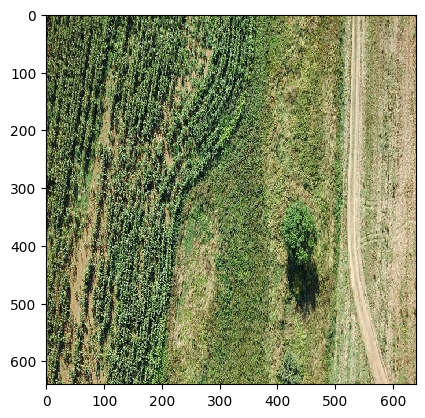

In [ ]:
img = coco.imgs[random.randint(0, len(coco.imgs))]
print(img)

image = np.array(
    Image.open(os.path.join(root_dir, subset_dir, img['file_name']))
)
plt.imshow(image, interpolation='nearest')
plt.show()

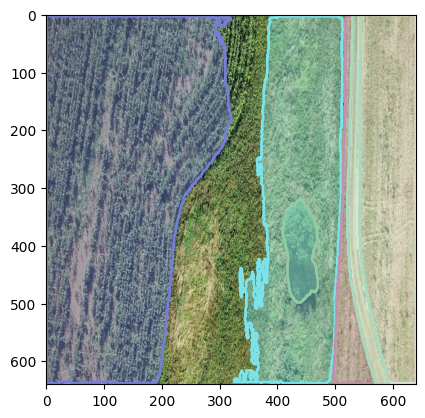

In [ ]:
plt.imshow(image)

cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

unique values: [0, 2, 4, 7]


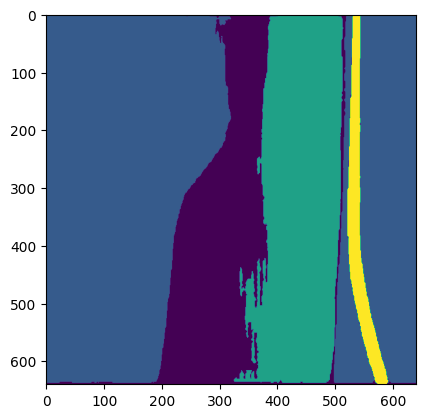

In [ ]:
mask_ = np.zeros((img['height'], img['width'])).astype(np.uint8)
for ann in anns:
    mask_ = np.maximum(mask_, coco.annToMask(ann) * ann['category_id'])

plt.imshow(mask_)
print('unique values:', list(np.unique(mask_)))

In [ ]:
# для вытаскивания файла с классами
rf = Roboflow(api_key="XowYkrGhdakTWNusIw5X")
project = rf.workspace("newwork-jsqzh").project("evodron-ncigr")
dataset = project.version(3).download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to evodron-3 in multiclass:: 100%|██████████| 1190/1190 [00:00<00:00, 1548.63it/s]


# Модель

In [ ]:
%cd /content/yolact

/content/yolact


In [ ]:
import gdown
pretrained_model = 'yolact_plus_base_54_800000.pth'
if not exists(pretrained_model):
  gdown.download(id='1yp7ZbbDwvMiFJEq4ptVKTYTI2VeRDXl0', output=pretrained_model, quiet=False)

In [ ]:
# Обучает yolact_base_config с размером пакета 5. Для моделей с разрешением 550 пикселей один пакет занимает около 1,5 гигабайт видеопамяти, поэтому укажите соответствующим образом.
!python train.py --config=yolact_plus_base_config --batch_size=5

# Возобновите обучение yolact_base с помощью определенного файла веса и начните с итерации, указанной в имени файла веса.
#!python train.py --config=yolact_plus_base_config --resume=weights/yolact_plus_#base_10_32100.pth --start_iter=-1

# Используйте опцию help, чтобы просмотреть описание всех доступных аргументов командной строки
#!python train.py --help

In [ ]:
evodron3_dataset = dataset_base.copy({
    'name': 'evodron-3',

    'train_images': '/content/evodron-3/train',
    'train_info':   '/content/evodron-3/train/_annotations.coco.json',

    'valid_images': '/content/evodron-3/valid',
    'valid_info':   '/content/evodron-3/valid/_annotations.coco.json',

    'has_gt': True,
    'class_names': ('building', 'field', 'forest', 'grass', 'ground', 'power_lines', 'road', 'water')
})

NameError: ignored

In [ ]:
# Trains using the base config with a batch size of 8 (the default).
!python train.py --config=yolact_plus_base_config

SyntaxError: ignored